In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\Shri\Desktop\Heart_Prediction\heart.csv")

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exang,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


<AxesSubplot:>

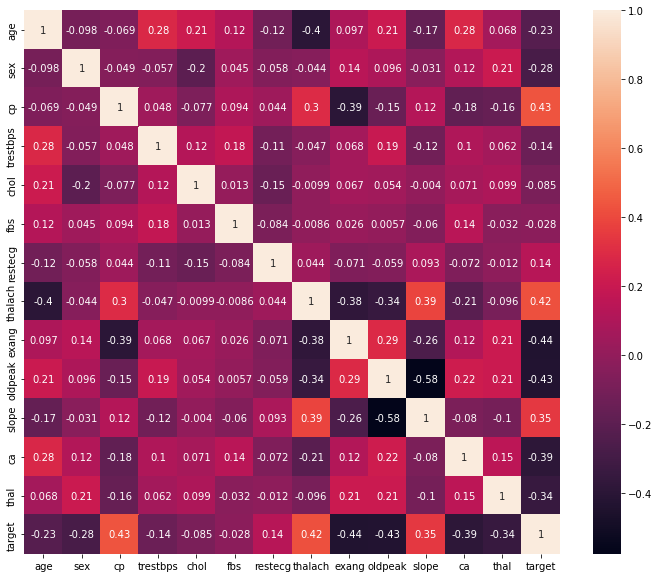

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)

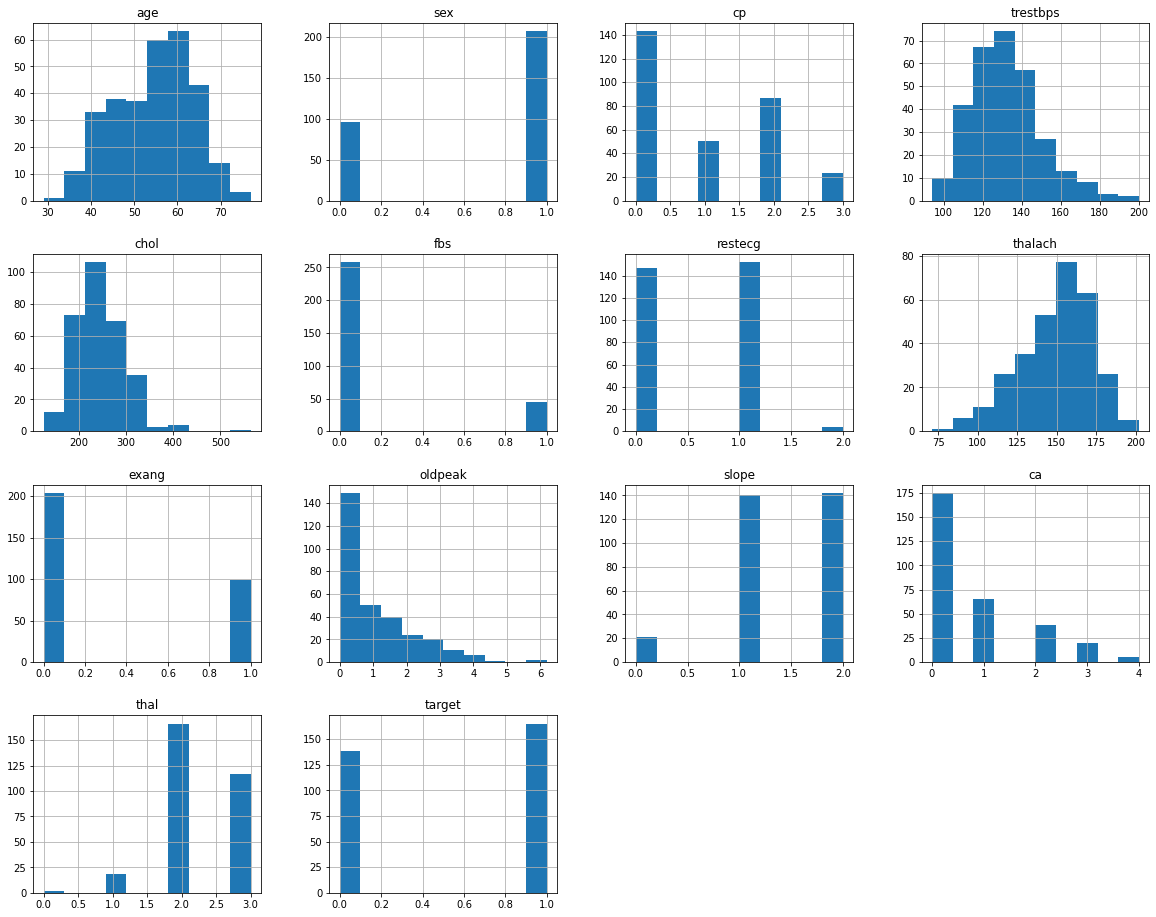

In [7]:
df.hist(figsize=(20, 16))
plt.show()

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
X = df.drop(['target'], axis=1)
y = df['target']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
sc = StandardScaler()

In [12]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [14]:
models = []
models.append(['RidgeClassifier', RidgeClassifier()])
models.append(['XGBClassifier', XGBClassifier(use_label_encoder=False, objective='binary:logistic', random_state=0, eval_metric='logloss')])
models.append(['Logistic Regression', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['DecisionTree', DecisionTreeClassifier(random_state=0)])
models.append(['AdaBoostClassifier', AdaBoostClassifier()])
models.append(['MLPClassifier', MLPClassifier(random_state=42, max_iter=1000)])
models.append(['ExtraTreesClassifier', ExtraTreesClassifier()])
models.append(['CatBoostClassifier', CatBoostClassifier(eval_metric='AUC', verbose=0)])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier()])
models.append(['SGDClassifier', SGDClassifier()])

In [15]:
lst_1 = []
for m in range(len(models)):
  lst_2 = []
  model = models[m][1]
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
  #k-fold validation
  roc = roc_auc_score(y_test, y_pred)
  print(models[m][0], ':')
  print(cm)
  print('Accuracy Score: ', accuracy_score(y_test, y_pred))
  print(' ')
  print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
  print(' ')
  print('ROC AUC Score: {:.2f}'.format(roc))
  print('-'*40)
  print(' ')
  lst_2.append(models[m][0])
  lst_2.append(accuracy_score(y_test, y_pred)*100)
  lst_2.append(accuracies.mean()*100)
  lst_2.append(roc)
  lst_1.append(lst_2)


RidgeClassifier :
[[15  3]
 [ 4 24]]
Accuracy Score:  0.8478260869565217
 
K-Fold Validation Mean Accuracy: 79.40 %
 
ROC AUC Score: 0.85
----------------------------------------
 
XGBClassifier :
[[15  3]
 [ 6 22]]
Accuracy Score:  0.8043478260869565
 
K-Fold Validation Mean Accuracy: 78.98 %
 
ROC AUC Score: 0.81
----------------------------------------
 
Logistic Regression :
[[15  3]
 [ 6 22]]
Accuracy Score:  0.8043478260869565
 
K-Fold Validation Mean Accuracy: 82.11 %
 
ROC AUC Score: 0.81
----------------------------------------
 
SVM :
[[15  3]
 [ 5 23]]
Accuracy Score:  0.8260869565217391
 
K-Fold Validation Mean Accuracy: 84.08 %
 
ROC AUC Score: 0.83
----------------------------------------
 
KNeighbors :
[[16  2]
 [ 4 24]]
Accuracy Score:  0.8695652173913043
 
K-Fold Validation Mean Accuracy: 81.31 %
 
ROC AUC Score: 0.87
----------------------------------------
 
GaussianNB :
[[15  3]
 [ 6 22]]
Accuracy Score:  0.8043478260869565
 
K-Fold Validation Mean Accuracy: 80.11 %

In [16]:
df2 = pd.DataFrame(lst_1, columns=['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'ROC_AUC'])
df2.sort_values(by=['ROC_AUC'], inplace=True, ascending=False)


In [17]:
df2

,Model,Accuracy,K-Fold Mean Accuracy,ROC_AUC
4,KNeighbors,86.956522,81.307692,0.873016
9,MLPClassifier,84.782609,75.907692,0.855159
0,RidgeClassifier,84.782609,79.400000,0.845238
3,SVM,82.608696,84.076923,0.827381
6,BernoulliNB,82.608696,83.261538,0.817460
11,CatBoostClassifier,82.608696,83.692308,0.817460
1,XGBClassifier,80.434783,78.984615,0.809524
2,Logistic Regression,80.434783,82.107692,0.809524
5,GaussianNB,80.434783,80.107692,0.809524
7,DecisionTree,80.434783,77.015385,0.809524


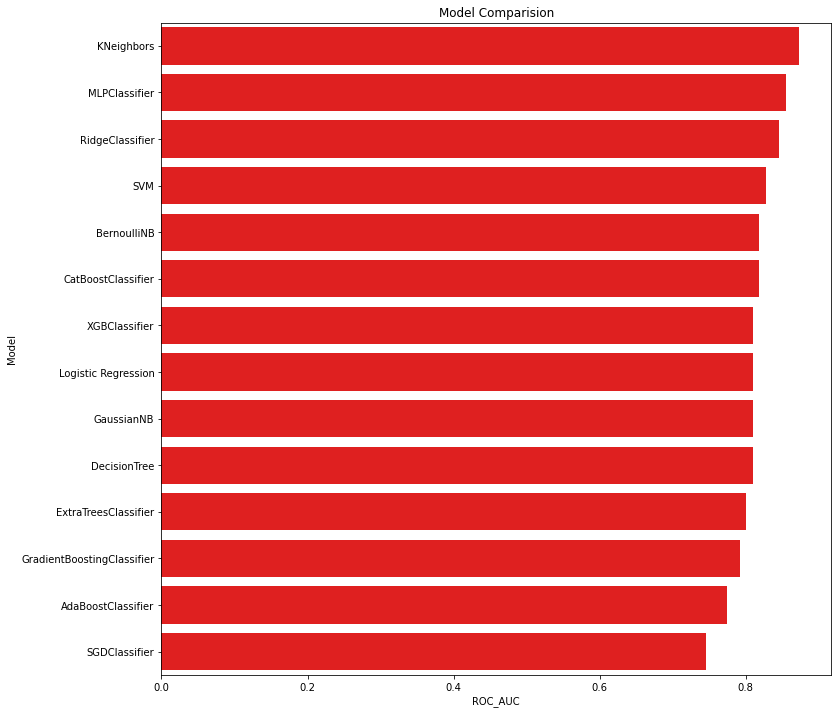

In [18]:
fig = plt.figure(figsize=(12, 12))
sns.barplot(x='ROC_AUC', y = 'Model', data=df2, color='r')
plt.title('Model Comparision');

In [19]:
grid_models = [
               (KNeighborsClassifier(), [{'n_neighbors':np.arange(1, 100), 'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
               (DecisionTreeClassifier(), [{'criterion':['gini', 'entropy'], 'max_depth':np.arange(1, 50), 'min_samples_leaf':[1, 2, 3]}]),
               (RandomForestClassifier(), [{'n_estimators':[100, 150, 200], 'criterion': ['gini', 'entropy'], 'min_samples_leaf':[2, 10, 30]}]),
               (MLPClassifier(),[{'solver':['lbfgs', 'sgd', 'adam'], 'learning_rate':['constant', 'invscaling', 'adaptive']}]),
               (RidgeClassifier(), [{'alpha':[0.1, 0.5, 1], 'solver':['auto', 'svd', 'cholesky']}]),
               (GaussianNB(), [{'var_smoothing': np.logspace(0, -9, num=100)}]),
               (XGBClassifier(use_label_encoder=False), [{'learning_rare':[0.01, 0.05, 0.1], 'eval_metric':['error', 'logloss']}])
]

In [20]:
import pickle

In [21]:
model = KNeighborsClassifier()

In [22]:
model.fit(X, y)

KNeighborsClassifier()

In [23]:
import joblib

In [24]:
joblib.dump(model, 'model.pkl')

['model.pkl']